<a href="https://colab.research.google.com/github/hfelizzola/Curso-Fundamentos-Ciencia-de-Datos-Fontebo/blob/main/3_Python_An%C3%A1lisis_Exploratorio_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos
### Curso de Ciencia de Datos


## Cargar librerías

In [ ]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns',None)

## Configurar la carpeta de almacenamiento de datos

In [ ]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')
# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Carga de datos

In [ ]:
# Cargar datos del archivo movies.xlsx
datos = pd.read_excel('peliculas.xlsx')
# Mostrar los primeros 5 registros
datos.head(5)

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014
1,Gangster Squad,60.0,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013
2,Quartet,11.0,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013
3,A Haunted House,2.5,40.041683,59.922558,Open Road,Comedy,R,1,11,2013
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012


## Paso 1. Estructura de los datos y operaciones básicas

### Revisión de la estructura de los datos

In [ ]:
# Obtener información general del dataframe
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   película       873 non-null    object 
 1   presupuesto    873 non-null    float64
 2   caja_usa       873 non-null    float64
 3   caja_mundial   873 non-null    float64
 4   productor      873 non-null    object 
 5   genero         873 non-null    object 
 6   clasificación  873 non-null    object 
 7   mes            873 non-null    int64  
 8   día            873 non-null    int64  
 9   año            873 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 68.3+ KB
None


El DataFrame `datos` contiene información sobre diferentes películas y sus atributos asociados. A continuación, se describe la estructura del DataFrame incluyendo el nombre de cada columna, el tipo de dato que contiene y una breve descripción:

| Columna         | Tipo de Dato | Descripción                                                                 |
|-----------------|--------------|-----------------------------------------------------------------------------|
| `película`      | object       | Nombre de la película.                                                      |
| `presupuesto`   | float64      | Presupuesto de la película en millones de dólares.                          |
| `caja_usa`      | float64      | Recaudación en Estados Unidos en millones de dólares.                       |
| `caja_mundial`  | float64      | Recaudación mundial en millones de dólares.                                 |
| `productor`     | object       | Productora de la película.                                                  |
| `genero`        | object       | Género de la película (e.g., Acción, Comedia, Drama, etc.).                 |
| `clasificación` | object       | Clasificación por edades de la película (e.g., PG-13, R, etc.).             |
| `mes`           | int64        | Mes de estreno de la película.                                              |
| `día`           | int64        | Día de estreno de la película.                                              |
| `año`           | int64        | Año de estreno de la película.                                              |

**Observaciones**
El DataFrame contiene un total de 873 entradas (filas).

* No hay valores nulos en ninguna de las columnas.
* Las columnas película, productor, genero y clasificación son de tipo object, lo que indica que contienen datos de texto.
* Las columnas presupuesto, caja_usa y caja_mundial son de tipo _float64_, lo que indica que contienen datos numéricos con decimales.
* Las columnas mes, día y año son de tipo _int64_, lo que indica que contienen datos numéricos enteros.

### Operaciones básicas en DataFrame

### Selección de Columnas en un DataFrame de Pandas


In [ ]:
# Seleccionar una columna: Seleccionar la columna 'caja_usa' y guardarlo en un nuevo objeto
caja_usa = datos['caja_usa']
caja_usa

0      18.848538
1      46.000903
2      18.388357
3      40.041683
4      66.528000
         ...    
868     2.529395
869     0.327000
870     0.005073
871    13.657115
872    75.658097
Name: caja_usa, Length: 873, dtype: float64

In [ ]:
# Seleccionar múltiples columnas: presupuesto, caja_usa, caja_mundial
info_financiera = datos[['presupuesto', 'caja_usa', 'caja_mundial']]
info_financiera.head()

,presupuesto,caja_usa,caja_mundial
0,70.0,18.848538,61.402445
1,60.0,46.000903,104.100903
2,11.0,18.388357,56.178935
3,2.5,40.041683,59.922558
4,25.0,66.528000,98.406855


### Crear columas en un DataFrame

In [ ]:
# Crear una columna de ingresos totales
datos['ingreso_total'] = datos['caja_usa'] + datos['caja_mundial']
datos.head(5)

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014,80.250983
1,Gangster Squad,60.0,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013,150.101806
2,Quartet,11.0,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013,74.567292
3,A Haunted House,2.5,40.041683,59.922558,Open Road,Comedy,R,1,11,2013,99.964241
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012,164.934855


In [ ]:
# Crear una columna de ganancia
datos['ganancia'] = datos['ingreso_total'] - datos['presupuesto']
datos.head(5)

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014,80.250983,10.250983
1,Gangster Squad,60.0,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013,150.101806,90.101806
2,Quartet,11.0,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013,74.567292,63.567292
3,A Haunted House,2.5,40.041683,59.922558,Open Road,Comedy,R,1,11,2013,99.964241,97.464241
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012,164.934855,139.934855


### Filtrado de Tablas en Pandas

In [ ]:
# Filtro con variables categóricas: filtrar los datos del genero 'Action'
genero_accion = datos[datos['genero'] == 'Action']
genero_accion

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012,164.934855,139.934855
10,The Green Hornet,110.0,98.780042,229.155503,Sony Pictures,Action,PG-13,1,14,2011,327.935545,217.935545
14,Jack Ryan: Shadow Recruit,60.0,50.577412,131.377412,Paramount Pictures,Action,PG-13,1,17,2014,181.954824,121.954824
20,The Last Stand,30.0,12.050299,48.330757,Lionsgate,Action,R,1,18,2013,60.381056,30.381056
21,Underworld: Awakening,70.0,62.321039,160.379930,Sony Pictures,Action,R,1,20,2012,222.700969,152.700969
...,...,...,...,...,...,...,...,...,...,...,...,...
832,Killer Elite,70.0,25.124986,65.409046,Open Road,Action,R,9,23,2011,90.534032,20.534032
838,The Equalizer,55.0,101.530738,192.165283,Sony Pictures,Action,R,9,26,2014,293.696021,238.696021
844,Looper,30.0,66.486205,170.466405,Sony Pictures,Action,R,9,28,2012,236.952610,206.952610
859,The Transporter Refueled,22.0,16.029670,67.920805,EuropaCorp,Action,PG-13,9,4,2015,83.950475,61.950475


In [ ]:
# Películas del productor Universal
productor_universal = datos[datos['productor'] == 'Universal']
productor_universal

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012,164.934855,139.934855
8,The Dilemma,70.0,48.475290,70.546865,Universal,Comedy,PG-13,1,14,2011,119.022155,49.022155
12,Blackhat,70.0,7.889395,19.535476,Universal,Thriller/Suspense,R,1,16,2015,27.424871,-42.575129
15,Ride Along,25.0,134.202565,153.733265,Universal,Comedy,PG-13,1,17,2014,287.935830,262.935830
18,Mama,15.0,71.628180,148.095566,Universal,Horror,PG-13,1,18,2013,219.723746,204.723746
...,...,...,...,...,...,...,...,...,...,...,...,...
819,A Walk Among the Tombstones,28.0,26.017685,42.517685,Universal,Action,R,9,19,2014,68.535370,40.535370
822,Rush,38.0,26.947624,98.230839,Universal,Drama,R,9,20,2013,125.178463,87.178463
845,Pitch Perfect,17.0,65.001093,116.044347,Universal,Comedy,PG-13,10,5,2012,181.045440,164.045440
852,Dream House,50.0,21.302340,39.932340,Universal,Horror,PG-13,9,30,2011,61.234680,11.234680


In [ ]:
# Filtrar con variables numéricas: filtrar éxitos en taquilla en USA. ingreso_total > 1000 millones
exitos = datos[datos['ingreso_total'] > 1000]
exitos

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
150,"The Twilight Saga: Breaking Dawn, Part 2",136.2,292.324737,829.724737,Lionsgate,Drama,PG-13,11,16,2012,1122.049474,985.849474
165,The Hunger Games: Mockingjay - Part 1,125.0,337.135885,709.635885,Lionsgate,Thriller/Suspense,PG-13,11,21,2014,1046.771770,921.771770
168,The Hunger Games: Catching Fire,130.0,424.668047,864.868047,Lionsgate,Adventure,PG-13,11,22,2013,1289.536094,1159.536094
169,Frozen,150.0,400.738009,1274.234980,Walt Disney,Adventure,PG,11,22,2013,1674.972989,1524.972989
193,Spectre,300.0,199.885714,879.432462,Sony Pictures,Action,PG-13,11,6,2015,1079.318176,779.318176
197,Skyfall,200.0,304.360277,1110.526981,Sony Pictures,Action,PG-13,11,9,2012,1414.887258,1214.887258
211,The Hobbit: The Desolation of Smaug,250.0,258.366855,960.366855,Warner Bros.,Adventure,PG-13,12,13,2013,1218.733710,968.733710
213,The Hobbit: An Unexpected Journey,250.0,303.003568,1017.003568,Warner Bros.,Adventure,PG-13,12,14,2012,1320.007136,1070.007136
218,The Hobbit: The Battle of the Five Armies,250.0,255.119788,955.119788,Warner Bros.,Adventure,PG-13,12,17,2014,1210.239576,960.239576
222,Star Wars Ep. VII: The Force Awakens,200.0,928.788515,2050.788515,Walt Disney,Adventure,PG-13,12,18,2015,2979.577030,2779.577030


In [ ]:
# Filtrar películas que generaron perdidas
perdidas = datos[datos['ganancia'] < 0]
perdidas

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
7,The Divide,3.0,0.018000,0.138274,Anchor Bay Entertainment,Thriller/Suspense,R,1,13,2012,0.156274,-2.843726
9,Down for Life,3.8,0.041914,0.041914,B.D. Fox Independent,Drama,R,1,14,2011,0.083828,-3.716172
12,Blackhat,70.0,7.889395,19.535476,Universal,Thriller/Suspense,R,1,16,2015,27.424871,-42.575129
26,R100,5.5,0.024956,0.024956,Drafthouse Films,Black Comedy,Not Rated,1,23,2015,0.049912,-5.450088
27,Song One,6.0,0.032251,0.032251,Cinedigm/Film Arcade,Drama,PG-13,1,23,2015,0.064502,-5.935498
...,...,...,...,...,...,...,...,...,...,...,...,...
860,Thunder and the House of Magic,34.0,0.004091,10.391684,Shout! Factory,Adventure,Not Rated,9,5,2014,10.395775,-23.604225
862,Winnie Mandela,15.0,0.061847,0.061847,Image Entertainment,Drama,R,9,6,2013,0.123694,-14.876306
868,Bucky Larson: Born to Be a Star,10.0,2.529395,2.529395,Sony Pictures,Comedy,R,9,9,2011,5.058790,-4.941210
869,Creature,3.0,0.327000,0.327000,The Bubble Factory,Horror,R,9,9,2011,0.654000,-2.346000


In [ ]:
# Peliculas con un presupuesto menor a 100 millones
datos[datos['presupuesto'] < 100]

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014,80.250983,10.250983
1,Gangster Squad,60.0,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013,150.101806,90.101806
2,Quartet,11.0,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013,74.567292,63.567292
3,A Haunted House,2.5,40.041683,59.922558,Open Road,Comedy,R,1,11,2013,99.964241,97.464241
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012,164.934855,139.934855
...,...,...,...,...,...,...,...,...,...,...,...,...
868,Bucky Larson: Born to Be a Star,10.0,2.529395,2.529395,Sony Pictures,Comedy,R,9,9,2011,5.058790,-4.941210
869,Creature,3.0,0.327000,0.327000,The Bubble Factory,Horror,R,9,9,2011,0.654000,-2.346000
870,Tanner Hall,3.0,0.005073,0.005073,Anchor Bay Entertainment,Drama,R,9,9,2011,0.010146,-2.989854
871,Warrior,25.0,13.657115,24.215385,Lionsgate,Drama,PG-13,9,9,2011,37.872500,12.872500


In [ ]:
# Filtrar con dos condiciones: filtrar exitos de Adventure, ingreso_total > 1000 y genero == Adventure
exitos_adventure = datos[(datos['ingreso_total'] > 1000) & (datos['genero'] == 'Adventure')]
exitos_adventure

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
168,The Hunger Games: Catching Fire,130.0,424.668047,864.868047,Lionsgate,Adventure,PG-13,11,22,2013,1289.536094,1159.536094
169,Frozen,150.0,400.738009,1274.234980,Walt Disney,Adventure,PG,11,22,2013,1674.972989,1524.972989
211,The Hobbit: The Desolation of Smaug,250.0,258.366855,960.366855,Warner Bros.,Adventure,PG-13,12,13,2013,1218.733710,968.733710
213,The Hobbit: An Unexpected Journey,250.0,303.003568,1017.003568,Warner Bros.,Adventure,PG-13,12,14,2012,1320.007136,1070.007136
218,The Hobbit: The Battle of the Five Armies,250.0,255.119788,955.119788,Warner Bros.,Adventure,PG-13,12,17,2014,1210.239576,960.239576
222,Star Wars Ep. VII: The Force Awakens,200.0,928.788515,2050.788515,Walt Disney,Adventure,PG-13,12,18,2015,2979.577030,2779.577030
520,Pirates of the Caribbean: On Stranger Tides,250.0,241.063875,1045.663875,Walt Disney,Adventure,PG-13,5,20,2011,1286.727750,1036.727750
544,The Avengers,225.0,623.279547,1519.479547,Walt Disney,Adventure,PG-13,5,4,2012,2142.759094,1917.759094
574,Inside Out,175.0,356.461711,853.884959,Walt Disney,Adventure,PG,6,19,2015,1210.346670,1035.346670
578,Monsters University,200.0,268.488329,743.588329,Walt Disney,Adventure,G,6,21,2013,1012.076658,812.076658


In [ ]:
# Seleccionar peliculas de Adventure o Action
datos[(datos['genero'] == 'Adventure') | (datos['genero'] == 'Action')]

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014,80.250983,10.250983
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012,164.934855,139.934855
10,The Green Hornet,110.0,98.780042,229.155503,Sony Pictures,Action,PG-13,1,14,2011,327.935545,217.935545
13,Paddington,55.0,76.223578,259.541430,Weinstein Co.,Adventure,PG,1,16,2015,335.765008,280.765008
14,Jack Ryan: Shadow Recruit,60.0,50.577412,131.377412,Paramount Pictures,Action,PG-13,1,17,2014,181.954824,121.954824
...,...,...,...,...,...,...,...,...,...,...,...,...
844,Looper,30.0,66.486205,170.466405,Sony Pictures,Action,R,9,28,2012,236.952610,206.952610
858,Falcon Rising,4.5,0.011774,0.011774,Freestyle Releasing,Adventure,R,9,5,2014,0.023548,-4.476452
859,The Transporter Refueled,22.0,16.029670,67.920805,EuropaCorp,Action,PG-13,9,4,2015,83.950475,61.950475
860,Thunder and the House of Magic,34.0,0.004091,10.391684,Shout! Factory,Adventure,Not Rated,9,5,2014,10.395775,-23.604225


In [ ]:
# Películas que generaron perdidas en el genero Action
datos[(datos['ganancia'] < 0) & (datos['genero'] == 'Action')]


,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
40,Wild Card,30.0,0.003200,0.929157,Lionsgate,Action,R,1,30,2015,0.932357,-29.067643
284,Bullet to the Head,55.0,9.489829,22.597969,Warner Bros.,Action,R,2,1,2013,32.087798,-22.912202
397,Sabotage,35.0,10.508518,18.376443,Open Road,Action,R,3,28,2014,28.884961,-6.115039
549,Hobo with a Shotgun,3.0,0.703372,0.834953,Magnolia Pictures,Action,Not Rated,5,6,2011,1.538325,-1.461675
552,Skin Trade,9.0,0.001242,0.001242,Magnolia Pictures,Action,R,5,8,2015,0.002484,-8.997516
628,Baahubali: The Beginning,40.0,6.738000,26.738000,Bluesky Cinemas,Action,Not Rated,7,10,2015,33.476000,-6.524000
655,R.I.P.D.,130.0,33.618855,79.072464,Universal,Action,PG-13,7,19,2013,112.691319,-17.308681
688,Attack the Block,13.0,1.024175,6.459183,Sony/Screen Gems,Action,R,7,29,2011,7.483358,-5.516642
732,Conan the Barbarian,90.0,21.295021,63.356133,Lionsgate,Action,R,8,19,2011,84.651154,-5.348846
747,Sin City: A Dame to Kill For,65.0,13.757804,39.499349,Weinstein Co.,Action,R,8,22,2014,53.257153,-11.742847


## Paso 2. Análisis univariado: Estadísticas Descriptivas y Gráficos

### Sumas

In [ ]:
# Ingreso total
datos['ingreso_total'].sum()

175140.097932

In [ ]:
# Ganancia total
datos['ganancia'].sum()

136338.444965

In [ ]:
# Presupuesto total
datos['presupuesto'].sum()

38801.652967

In [ ]:
datos['ganancia'].sum()/datos['presupuesto'].sum()

3.5137277548704695

### Promedio y mediana

In [ ]:
# Ingreso medio por película
datos['ingreso_total'].mean()

200.61866887972508

Las películas tienen un ingreso promedio cercano 200 millones de dolares.

In [ ]:
# Mediana del ingreso
datos['ingreso_total'].median()

87.997352

El 50% de las películas tiene un ingreso de 88 millones o menos.

In [ ]:
# Ganancia media por película
datos['ganancia'].mean()


156.17233100229095

***Respuesta***

In [ ]:
# Mediana de la ganancia por película
datos['ganancia'].median()


59.531361000000004

***Respuesta:***

### Mínimos y máximos

In [ ]:
# Ingreso mímino
datos['ingreso_total'].min()

0.0

In [ ]:
datos[datos['ingreso_total'] == 0]

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
269,After,0.65,0.0,0.0,Paladin,Drama,R,8,8,2014,0.0,-0.65
270,Highway,2.00,0.0,0.0,UTV Communications,Drama,Not Rated,2,21,2014,0.0,-2.00
704,Point Blank,3.00,0.0,0.0,Magnolia Pictures,Thriller/Suspense,R,7,29,2011,0.0,-3.00


In [ ]:
# Ingreso máximo
datos['ingreso_total'].max()

2979.5770300000004

In [ ]:
datos[datos['ingreso_total'] > 2000]

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
222,Star Wars Ep. VII: The Force Awakens,200.0,928.788515,2050.788515,Walt Disney,Adventure,PG-13,12,18,2015,2979.577030,2779.577030
544,The Avengers,225.0,623.279547,1519.479547,Walt Disney,Adventure,PG-13,5,4,2012,2142.759094,1917.759094
563,Jurassic World,215.0,652.198010,1670.328025,Universal,Action,PG-13,6,12,2015,2322.526035,2107.526035


In [ ]:
# Ganancia mínima
datos['ganancia'].min()


-89.057484

In [ ]:
# Peliculas con perdidas superiores a 50 millones
datos[datos['ganancia'] < -50]

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
357,Mars Needs Moms,150.0,21.392758,39.549758,Walt Disney,Adventure,PG,3,11,2011,60.942516,-89.057484


In [ ]:
# Ganancia máxima
datos['ganancia'].max()


2779.5770300000004

In [ ]:
# peliculas con ganancia superior a 2000 millones
datos[datos['ganancia'] > 2000]

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
222,Star Wars Ep. VII: The Force Awakens,200.0,928.788515,2050.788515,Walt Disney,Adventure,PG-13,12,18,2015,2979.577030,2779.577030
563,Jurassic World,215.0,652.198010,1670.328025,Universal,Action,PG-13,6,12,2015,2322.526035,2107.526035


### Rango y Desviación Estándar

In [ ]:
# Rango ingreso
datos['ingreso_total'].max() - datos['ingreso_total'].min()

2979.5770300000004

In [ ]:
# Desviación Estandar ingreso
datos['ingreso_total'].std()

316.5962783544246

In [ ]:
# Coeficiente de variación para el ingreso total
datos['ingreso_total'].std()/datos['ingreso_total'].mean()

1.5780997856397425

In [ ]:
# Rango ganancia
datos['ganancia'].max() - datos['ganancia'].min()


2868.6345140000003

In [ ]:
# Desviación estándar ganancia
datos['ganancia'].std()


276.7781096196372

In [ ]:
# Coeficiente de variación para la ganancia
datos['ganancia'].std()/datos['ganancia'].mean()

1.7722608598035015

### Histograma

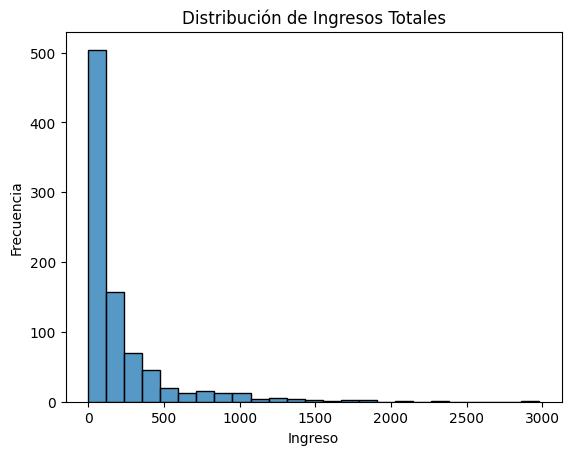

In [ ]:
# Distribución de los ingresos
sns.histplot(datos['ingreso_total'], bins=25)
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos Totales')
plt.show()

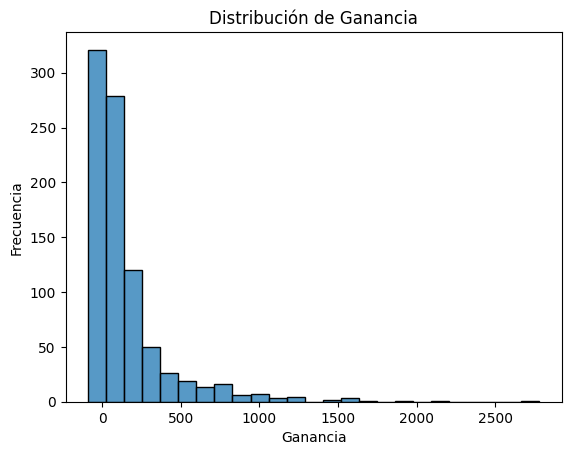

In [ ]:
# Distribución de la ganancia
sns.histplot(datos['ganancia'], bins=25)
plt.xlabel('Ganancia')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ganancia')
plt.show()


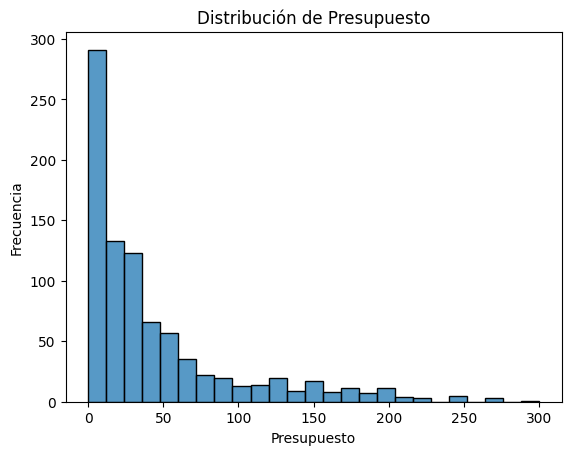

In [ ]:
# Distribución de los presupuestos
sns.histplot(datos['presupuesto'], bins=25)
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Presupuesto')
plt.show()

### Cuartiles

¿Cómo se distribuyen los ingresos de las películas y qué podemos inferir sobre las categorías de películas con ingresos bajos, medios y altos?

In [ ]:
# Ingresos bajos (Q1)
ingresos_bajos = datos['ingreso_total'].quantile(0.25)
# Ingresos medios (Q2)
ingresos_medios = datos['ingreso_total'].quantile(0.5)
# Ingresos altos (Q3)
ingresos_altos = datos['ingreso_total'].quantile(0.75)

# Imprimir resultados
print(f'Ingresos bajos: {ingresos_bajos}')
print(f'Ingresos medios: {ingresos_medios}')
print(f'Ingresos altos: {ingresos_altos}')

Ingresos bajos: 14.769823
Ingresos medios: 87.997352
Ingresos altos: 234.814374


¿Donde se ubica el 1% de las películas con los ingresos mas altos?

In [ ]:
# Percentil 99%
datos['ingreso_total'].quantile(0.99)

1508.881586799999

In [ ]:
# Filtrar las peliculas que tienen ingresos superiores al percentil 99%
datos[datos['ingreso_total'] > datos['ingreso_total'].quantile(0.99)]

,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia
169,Frozen,150.0,400.738009,1274.234980,Walt Disney,Adventure,PG,11,22,2013,1674.972989,1524.972989
222,Star Wars Ep. VII: The Force Awakens,200.0,928.788515,2050.788515,Walt Disney,Adventure,PG-13,12,18,2015,2979.577030,2779.577030
482,Furious 7,190.0,351.032910,1514.019071,Universal,Action,PG-13,4,3,2015,1865.051981,1675.051981
496,The Avengers: Age of Ultron,250.0,459.005868,1404.705868,Walt Disney,Action,PG-13,5,1,2015,1863.711736,1613.711736
539,Iron Man 3,200.0,408.992272,1215.392272,Walt Disney,Action,PG-13,5,3,2013,1624.384544,1424.384544
544,The Avengers,225.0,623.279547,1519.479547,Walt Disney,Adventure,PG-13,5,4,2012,2142.759094,1917.759094
563,Jurassic World,215.0,652.198010,1670.328025,Universal,Action,PG-13,6,12,2015,2322.526035,2107.526035
641,Harry Potter and the Deathly Hallows: Part II,125.0,381.011219,1341.511219,Warner Bros.,Adventure,PG-13,7,15,2011,1722.522438,1597.522438
662,The Dark Knight Rises,275.0,448.139099,1084.439099,Warner Bros.,Action,PG-13,7,20,2012,1532.578198,1257.578198


In [ ]:
(datos[datos['ingreso_total'] > datos['ingreso_total'].quantile(0.99)]).shape

(9, 12)

In [ ]:
np.sum(datos['ingreso_total'] > datos['ingreso_total'].quantile(0.99))

9

In [ ]:
# Ganancias bajas (Q1)

# Ganancias medias (Q2)

# Ganancias altas (Q3)

# Imprimir resultados


### Gráficos de caja

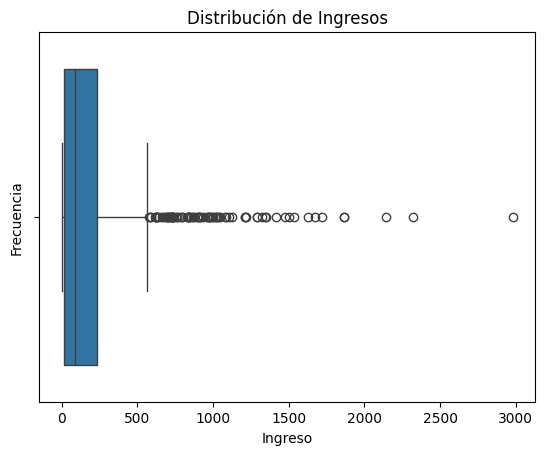

In [ ]:
# Distribución de los ingresos
sns.boxplot(x=datos['ingreso_total'])
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos')
plt.show()

In [ ]:
# Contar peliculas con mas de 500 millones de pesos en ingresos
datos[datos['ingreso_total'] > 520].shape

(89, 12)

In [ ]:
# 89 peliculas
# 13 columnas

In [ ]:
# Distribución de las ganancias


### Resumen estadístico de variables categóricas

In [ ]:
# Resumen de variables numéricas
datos[['presupuesto', 'caja_usa', 'caja_mundial','ingreso_total','ganancia']].describe()

,presupuesto,caja_usa,caja_mundial,ingreso_total,ganancia
count,873.000000,873.000000,873.000000,873.000000,873.000000
mean,44.446338,57.448418,143.170251,200.618669,156.172331
std,54.005903,84.265678,235.686308,316.596278,276.778110
min,0.003967,0.000000,0.000000,0.000000,-89.057484
25%,8.000000,4.231500,10.106975,14.769823,3.248973
50%,25.000000,30.542576,56.238045,87.997352,59.531361
75%,58.000000,72.688614,160.903019,234.814374,171.738126
max,300.000000,928.788515,2050.788515,2979.577030,2779.577030


### Tablas de frecuencia

In [ ]:
# Películas por genero
datos['genero'].value_counts()

genero
Drama                  239
Comedy                 163
Thriller/Suspense      120
Action                 105
Adventure               96
Horror                  54
Romantic Comedy         38
Documentary             22
Black Comedy            16
Musical                  9
Concert/Performance      7
Western                  4
Name: count, dtype: int64

In [ ]:
# Porcentaje por genero
datos['genero'].value_counts(normalize=True)

genero
Drama                  0.273769
Comedy                 0.186712
Thriller/Suspense      0.137457
Action                 0.120275
Adventure              0.109966
Horror                 0.061856
Romantic Comedy        0.043528
Documentary            0.025200
Black Comedy           0.018328
Musical                0.010309
Concert/Performance    0.008018
Western                0.004582
Name: proportion, dtype: float64

In [ ]:
tab_frec_genero = datos['genero'].value_counts().reset_index(name='frecuencia')
tab_frec_genero['porcentaje'] = tab_frec_genero['frecuencia']/tab_frec_genero['frecuencia'].sum()
tab_frec_genero

,genero,frecuencia,porcentaje
0,Drama,239,0.273769
1,Comedy,163,0.186712
2,Thriller/Suspense,120,0.137457
3,Action,105,0.120275
4,Adventure,96,0.109966
5,Horror,54,0.061856
6,Romantic Comedy,38,0.043528
7,Documentary,22,0.025200
8,Black Comedy,16,0.018328
9,Musical,9,0.010309


In [ ]:
# Películas por productor


### Gráficos de barra y torta

<Axes: ylabel='genero'>

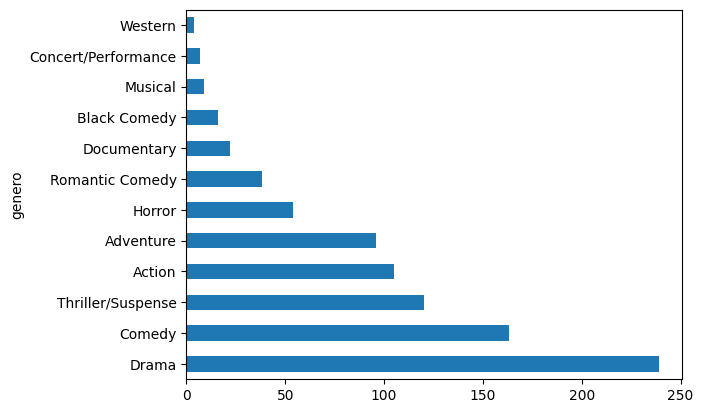

In [ ]:
datos['genero'].value_counts().plot.barh()

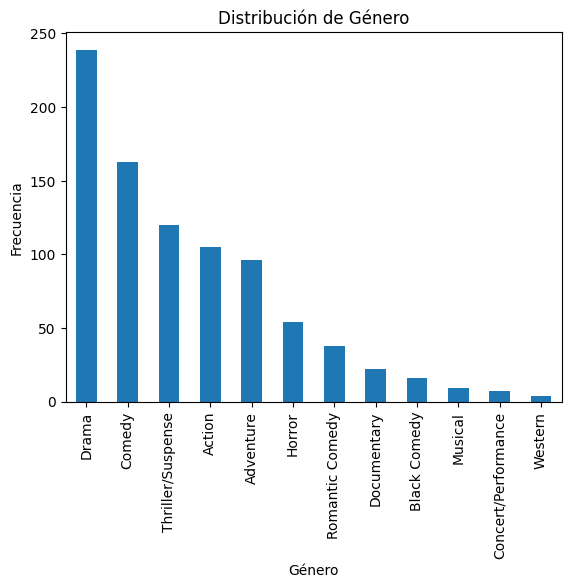

In [ ]:
# Gráfico de barra del genero
datos['genero'].value_counts().plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Distribución de Género')
plt.show()


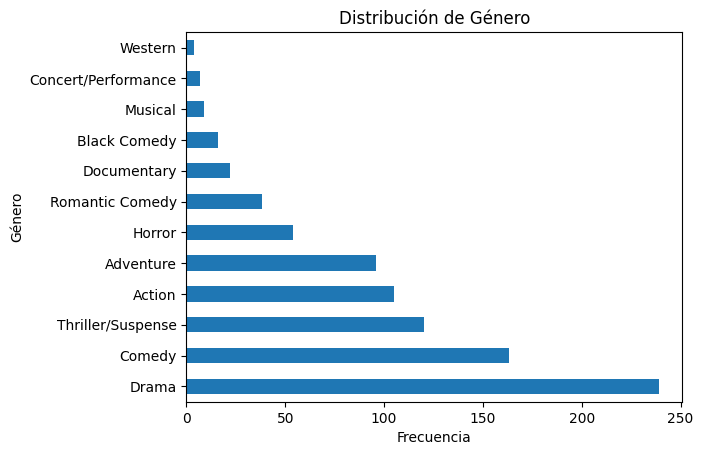

In [ ]:
# Gráfico de barra horizontal
datos['genero'].value_counts().plot(kind='barh')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Distribución de Género')
plt.show()

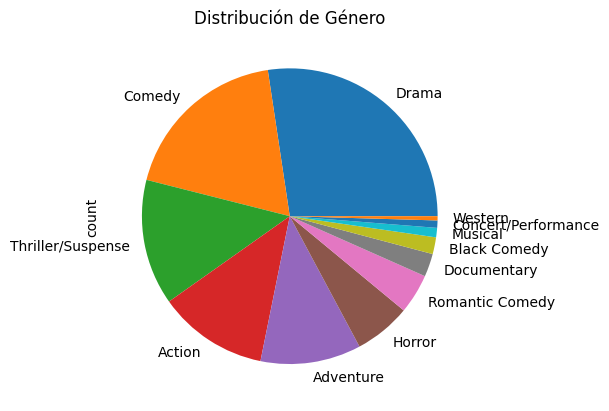

In [ ]:
# Gráfico de torta para el genero
datos['genero'].value_counts().plot(kind='pie')
plt.title('Distribución de Género')
plt.show()

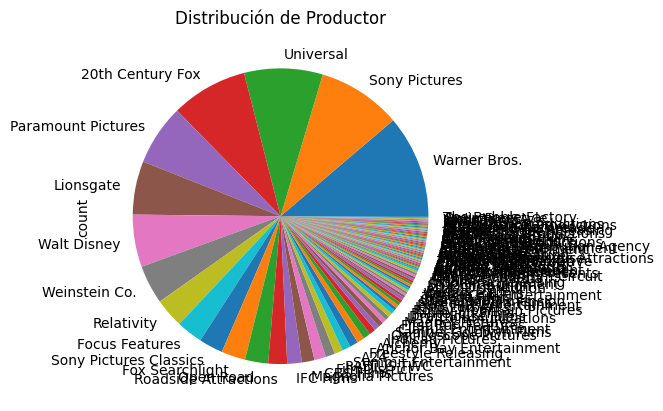

In [ ]:
datos['productor'].value_counts().plot(kind='pie')
plt.title('Distribución de Productor')
plt.show()

In [ ]:
datos.to_excel('movies_v2.xlsx', index=False)

### Ideas claves univariado

Tome 15 minutos revise las estadísticas nuevamente y registre las 5 ideas principales que puede extraer el análisis estadístico:
1.
2.
3.
4.
5.

## Paso 3. Análisis bivariado: Análisis de variables categóricas

### Gráficos de dispersion

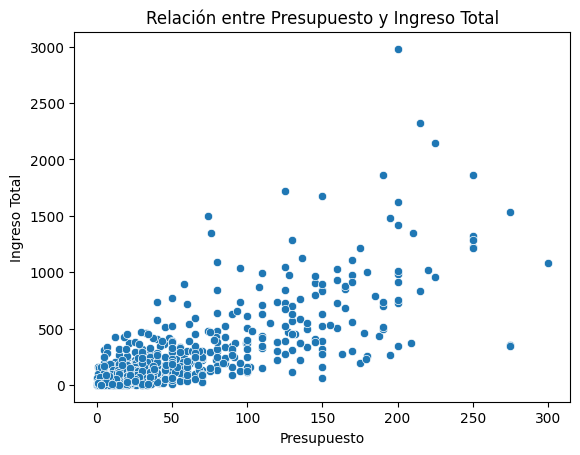

In [ ]:
# Gráfico de dispersión: Presupuesto vs ingresos
sns.scatterplot(x=datos['presupuesto'], y=datos['ingreso_total'])
plt.xlabel('Presupuesto')
plt.ylabel('Ingreso Total')
plt.title('Relación entre Presupuesto y Ingreso Total')
plt.show()

In [ ]:
# Gráfico de dispersión: Presupuesto vs ganancia



### Coeficiente de correlación

In [ ]:
# Coeficiente de correlación: presupuesto, ingreso total, ganancia
datos[['presupuesto', 'ingreso_total', 'ganancia']].corr()

,presupuesto,ingreso_total,ganancia
presupuesto,1.000000,0.776220,0.692766
ingreso_total,0.776220,1.000000,0.992404
ganancia,0.692766,0.992404,1.000000


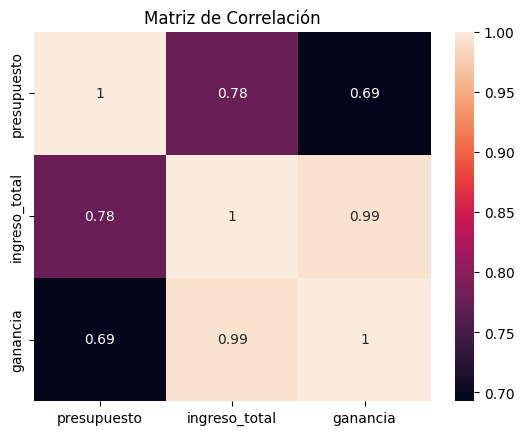

In [ ]:
# Gráficar la correlación
sns.heatmap(datos[['presupuesto', 'ingreso_total', 'ganancia']].corr(), annot=True)
plt.title('Matriz de Correlación')
plt.show()

### Estadísticas agrupadas


In [ ]:
# Ingresos medios por genero
datos.groupby('genero')['ingreso_total'].mean()

genero
Action                 409.081769
Adventure              532.126905
Black Comedy           110.822387
Comedy                 166.342797
Concert/Performance     64.186793
Documentary              4.535760
Drama                   92.392095
Horror                  98.990457
Musical                161.069528
Romantic Comedy        109.790016
Thriller/Suspense      145.447127
Western                290.925942
Name: ingreso_total, dtype: float64

In [ ]:
# Ingresos medios por genero (ordenado)
datos.groupby('genero')['ingreso_total'].mean().sort_values(ascending=False)

genero
Adventure              532.126905
Action                 409.081769
Western                290.925942
Comedy                 166.342797
Musical                161.069528
Thriller/Suspense      145.447127
Black Comedy           110.822387
Romantic Comedy        109.790016
Horror                  98.990457
Drama                   92.392095
Concert/Performance     64.186793
Documentary              4.535760
Name: ingreso_total, dtype: float64

In [ ]:
# Ganancias medias por genero (ordenado)


### Gráficos de caja para comparar categorías

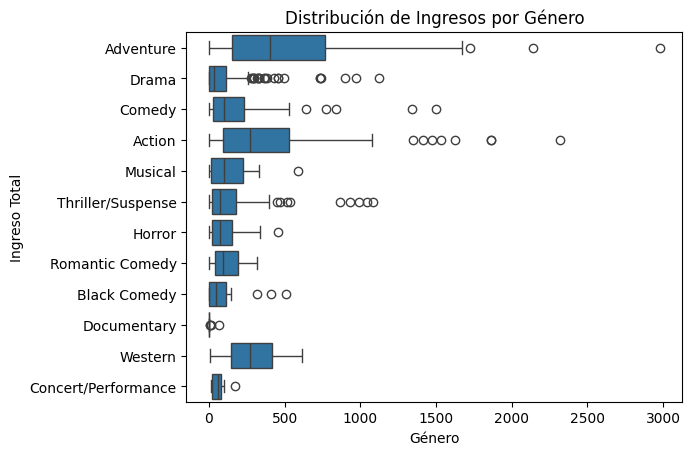

In [ ]:
# Grafíco de caja: ingresos por genero
sns.boxplot(y=datos['genero'], x=datos['ingreso_total'])
plt.xlabel('Género')
plt.ylabel('Ingreso Total')
plt.title('Distribución de Ingresos por Género')
plt.show()

In [ ]:
# Gráfico de caja: ganancias por genero


### Pivoteo de tablas

In [ ]:
# Lanzamientos por año y genero
datos.pivot_table(index='año', columns='genero', values='película', aggfunc='count', fill_value=0)

genero,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
año,,,,,,,,,,,,
2011,23,21,4,37,3,3,64,16,1,13,23,0
2012,17,17,4,39,1,5,44,13,3,9,27,1
2013,23,20,5,32,3,4,33,8,2,8,30,1
2014,22,22,1,26,0,4,60,7,2,6,20,1
2015,20,16,2,29,0,6,38,10,1,2,20,1


In [ ]:
# Ingresos por año y genero
datos.pivot_table(index='año', columns='genero', values='ingreso_total', aggfunc='sum', fill_value=0)

genero,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
año,,,,,,,,,,,,
2011,8235.694572,9565.668169,83.743409,5735.595915,216.791703,3.546892,3929.942518,1328.538049,114.792576,1796.582806,2967.353037,0.000000
2012,5605.115625,11864.742864,345.523870,4948.645768,58.026510,78.059287,5698.968201,935.584858,752.619394,1003.273883,4162.888466,612.753757
2013,8474.805058,10863.544275,1093.769220,6263.701631,174.489339,17.132683,3084.202481,1315.669321,24.662655,521.421620,3728.382849,349.279820
2014,9172.829349,10894.258144,145.581196,3628.819359,0.000000,0.206532,5719.902675,854.174647,557.256531,642.512171,3126.043275,5.872842
2015,11465.141131,7895.969406,104.540496,6537.113319,0.000000,0.841326,3648.694896,911.517817,0.294598,208.230136,3468.987657,195.797348


### Series de tiempo

In [ ]:
# Serie de tiempo: lanzamientos por año
datos.groupby('año').size()

año
2011    208
2012    180
2013    169
2014    171
2015    145
dtype: int64

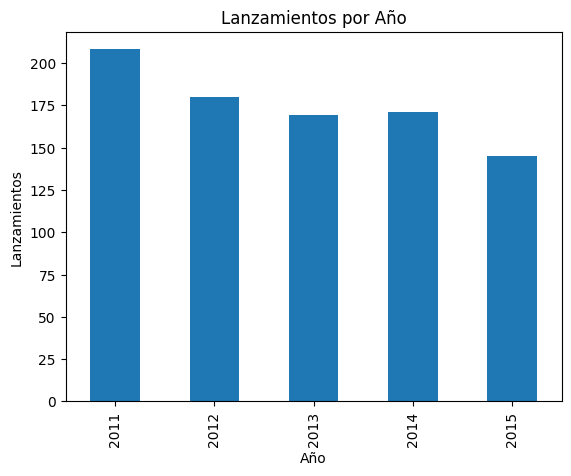

In [ ]:
# Gráfico: lanzamientos por año
datos.groupby('año').size().plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Lanzamientos')
plt.title('Lanzamientos por Año')
plt.show()

In [ ]:
# Ingresos totales por año
datos.groupby('año')['ingreso_total'].sum()

año
2011    33978.249646
2012    36066.202483
2013    35911.060952
2014    34747.456721
2015    34437.128130
Name: ingreso_total, dtype: float64

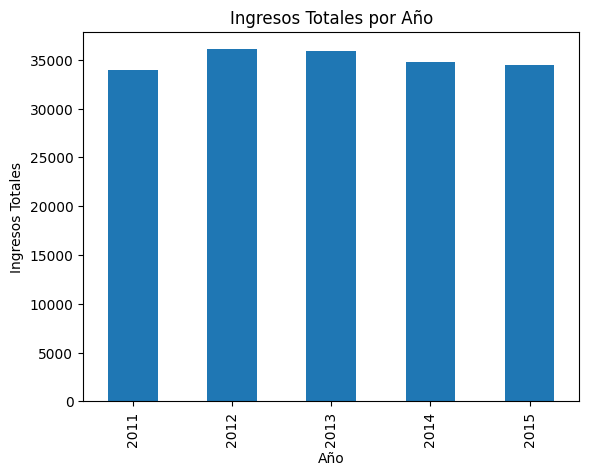

In [ ]:
# Gráfica: Ingresos totales por año
datos.groupby('año')['ingreso_total'].sum().plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Año')
plt.show()


### Ideas claves análisis bivariado

Tome 15 minutos revise las estadísticas nuevamente y registre las 5 ideas principales que puede extraer el análisis estadístico:

1.
2.
3.
4.
5.

## Preguntas varias

### Manejo de formato fecha

In [ ]:
# prompt: concantena las columnas dias, mes y año y conviertelas en formato fecha

# Concatenar columnas
datos['fecha_texto'] = datos['día'].astype(str) + '-' + datos['mes'].astype(str) + '-' + datos['año'].astype(str)

# Convertir a formato fecha
datos['fecha'] = pd.to_datetime(datos['fecha_texto'], format='%d-%m-%Y')

# Eliminar columna 'fecha_texto' si ya no es necesaria
datos = datos.drop('fecha_texto', axis=1)

# Mostrar los primeros 5 registros
datos.head(5)


,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia,fecha
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014,80.250983,10.250983,2014-01-10
1,Gangster Squad,60.0,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013,150.101806,90.101806,2013-01-11
2,Quartet,11.0,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013,74.567292,63.567292,2013-01-11
3,A Haunted House,2.5,40.041683,59.922558,Open Road,Comedy,R,1,11,2013,99.964241,97.464241,2013-01-11
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012,164.934855,139.934855,2012-01-13


In [ ]:
# prompt: ahora extrae el mes, el año y dia de la columna fecha

# Extraer mes, año y día de la columna 'fecha'
datos['mes'] = datos['fecha'].dt.month # Extraer el mes
datos['año'] = datos['fecha'].dt.year # Extrae el año
datos['día'] = datos['fecha'].dt.day # Extrae

# Mostrar los primeros 5 registros
datos.head(5)


,película,presupuesto,caja_usa,caja_mundial,productor,genero,clasificación,mes,día,año,ingreso_total,ganancia,fecha
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014,80.250983,10.250983,2014-01-10
1,Gangster Squad,60.0,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013,150.101806,90.101806,2013-01-11
2,Quartet,11.0,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013,74.567292,63.567292,2013-01-11
3,A Haunted House,2.5,40.041683,59.922558,Open Road,Comedy,R,1,11,2013,99.964241,97.464241,2013-01-11
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012,164.934855,139.934855,2012-01-13


### Agrupación en categorías

In [ ]:
# Clasificar las peliculas por el nivel de ingresos según el cuartil
cuartil_ingresos = datos['ingreso_total'].quantile([0, 0.25, 0.5, 0.75, 1])
datos['nivel_ingreso'] = pd.cut(datos['ingreso_total'], bins=cuartil_ingresos, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Resumir la tabla de nivel de ingresos
datos.groupby('nivel_ingreso').size()

nivel_ingreso
Bajo        216
Medio       218
Alto        218
Muy Alto    218
dtype: int64

In [ ]:
# División personalizada de los ingresos [0, 100, 500, 1000, 3000]
datos['nivel_ingreso'] = pd.cut(datos['ingreso_total'], bins=[0, 100, 500, 1000, 3000], labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Resumir la tabla de nivel de ingresos
datos.groupby('nivel_ingreso').size()

nivel_ingreso
Bajo        464
Medio       313
Alto         64
Muy Alto     29
dtype: int64

### Gráficos de control

In [ ]:
# Graficar total ingresos
# Agrupar por mes y sumar los ingresos
datos['mes_range'] = datos['fecha'].dt.to_period('M')
ingresos_mensuales = datos.groupby('mes_range')['ingreso_total'].sum()
ingresos_mensuales.head(8)

mes_range
2011-01    1018.546165
2011-02    2061.183845
2011-03    1909.746821
2011-04    2847.774873
2011-05    4653.703338
2011-06    3810.342694
2011-07    4561.545077
2011-08    2103.601935
Freq: M, Name: ingreso_total, dtype: float64

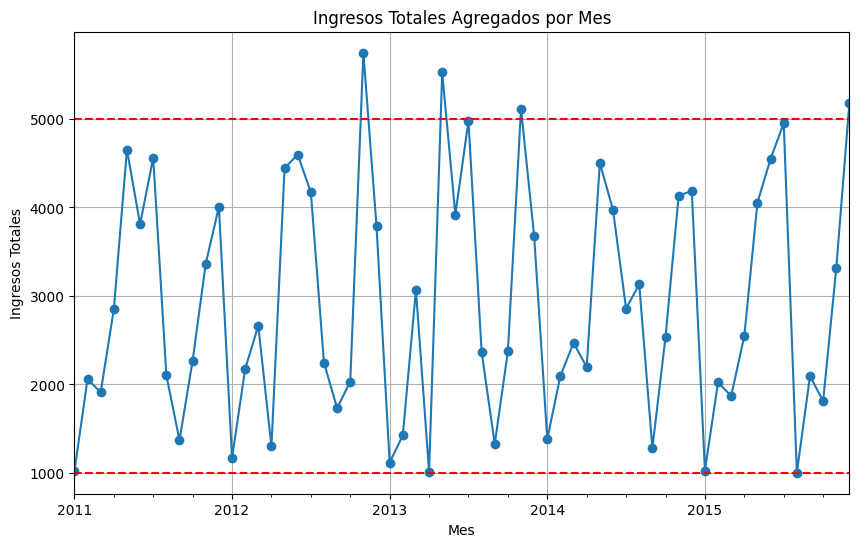

In [ ]:
# Crear la gráfica de serie de tiempo
plt.figure(figsize=(10, 6))
ingresos_mensuales.plot(kind='line', marker='o')
# lineas horizontales en 1000 y 5000
plt.axhline(y=1000, color='r', linestyle='--')
plt.axhline(y=5000, color='r', linestyle='--')
plt.title('Ingresos Totales Agregados por Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos Totales')
plt.grid(True)
plt.show()

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   película       873 non-null    object        
 1   presupuesto    873 non-null    float64       
 2   caja_usa       873 non-null    float64       
 3   caja_mundial   873 non-null    float64       
 4   productor      873 non-null    object        
 5   genero         873 non-null    object        
 6   clasificación  873 non-null    object        
 7   mes            873 non-null    int32         
 8   día            873 non-null    int32         
 9   año            873 non-null    int32         
 10  ingreso_total  873 non-null    float64       
 11  ganancia       873 non-null    float64       
 12  fecha          873 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int32(3), object(4)
memory usage: 78.6+ KB


# Caso. Estimación de gastos médicos

**Contexto**

Para que una compañía de seguros gane dinero, necesita recaudar más en primas anuales de lo que gasta en atención médica para sus beneficiarios. Como resultado, las aseguradoras invierten una gran cantidad de tiempo y dinero para desarrollar modelos que pronostiquen con precisión los costos por servicios de salud.

En algunos casos los costos son difíciles de estimar porque las condiciones más costosas son raras y aparentemente aleatorias. Aun así, algunas condiciones son más frecuentes para ciertos segmentos de la población. Por ejemplo, el cáncer de pulmón es más probable entre los fumadores que los no fumadores, y la enfermedad cardíaca puede ser más probable entre los obesos.

**Objetivo del Caso**

Utilizar datos de pacientes para estimar los costos de atención médica para dichos segmentos de población. Estas estimaciones podrían usarse para crear tablas actuariales que fijen el precio de las primas anuales más o menos según los costos de tratamiento esperados.

**Datos**

El archivo _gastos_medicos.xlsx_ incluye 1338 casos de beneficiarios actualmente inscritos en el plan de seguro, con variables que indican las características del paciente, así como los gastos médicos totales cargados al plan para el año calendario. La información que se tiene disponible para cada asegurado es:

* **sexo:** este es el género del titular de la póliza, ya sea hombre o mujer.
* **edad:** es un número entero que indica la edad del beneficiario primario (excluyendo a los mayores de 64 años, ya que generalmente están cubiertos por el gobierno).
* **hijos:** este es un número entero que indica el número de hijos / dependientes cubiertos por el plan de seguro.
* **región:** este es el lugar de residencia del beneficiario en los EE. UU., Dividido en cuatro regiones geográficas: noreste, sureste, suroeste o noroeste.
* **imc:** este es el índice de masa corporal (body mass index - bmi), que proporciona una idea de cómo una persona con sobrepeso o bajo peso es relativa a su altura. El IMC es igual al peso (en kilogramos) dividido por la altura (en metros) al cuadrado. Un IMC ideal está dentro del rango de 18.5 a 24.9.
* **fumador:** Esto es sí o no, dependiendo de si el asegurado fuma regularmente.
* **gastos:** gastos médicos cargados al asegurado en el año calendario. Esta es la variable a predecir.